In [12]:
import pmcx
import numpy as np
import mpmath as mp # mpmath documentation https://mpmath.org/doc/current/mpmath.pdf
import matplotlib.pyplot as plt

In [ ]:
res = pmcx.run(nphoton=1000000, 
               vol=np.ones([60, 60, 60], dtype='uint8'), 
               tstart=0, 
               tend=5e-9, 
               tstep=5e-9, 
               srcpos=[30,30,0], 
               srcdir=[0,0,1], 
               prop=np.array([[0, 0, 1, 1], [0.005, 1, 0.01, 1.37]]),
               )
res['flux'].shape

plt.imshow(np.log10(res['flux'][30,:, :]))
plt.show()

R is 0.00000000000000000000000000000080932999200801115164567969529068972341461198879911222692636812500461882519725853618670489224527260677582616051101571985012232617
Integral is -1886353559497462579956562637409811467550396469964048315503802214975935168642645844610643280.8821808227023952816251428389888635708 for theta 0.0 and wavelen 0.00000000010000000000000000364321973154977415791655470655996396089904010295867919921875
R is 0.00000000000000000000000000000080932999200801115164567969529068972341461198879911222692636812500461882519725853618670489224527260677582616051101571985012232617
Integral is -1886353559497462579956562637409811467550396469964048315503802214975935168642645844610643280.8821808227023952816251428389888635708 for theta 0 and wavelen 0.00000000010000000000000000364321973154977415791655470655996396089904010295867919921875
R is 0.000000000000000000000000000000809329992008011151645679695290689723414611988799112226926368125004618825197258536186704892245272606775826160511015719

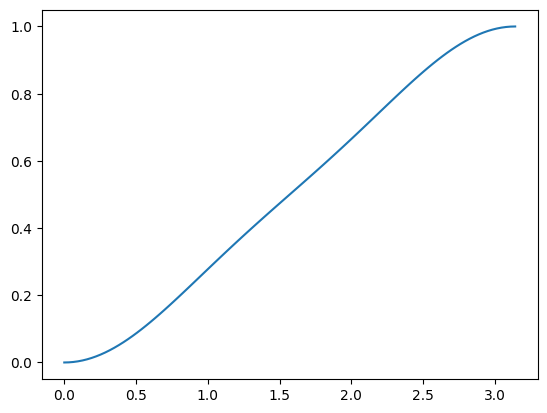

In [14]:
# Set desired precision (e.g., 128 decimal places)
mp.mp.dps = 128

def integral_klein_nishina(theta, wavelen):
    # Adapted from https://physics.stackexchange.com/questions/690255/angle-energy-dependent-cdf-for-compton-scattering

    cosTheta = mp.cos(theta)
    wavelen = mp.mpf(wavelen)

    h = mp.mpf(6.62607015e-34)
    c = mp.mpf(299792458)
    m = mp.mpf(9.10938356e-31)

    R = (h*wavelen)/(m*c**2)
    print(f"R is {R}")

    out = -(cosTheta/R**2) + mp.log(1 + R*(1-cosTheta)) * (1/R - 2/R**2 - 2/R**3)
    out = out - 1/(2*R*(1+R*(1-cosTheta))**2) + 1/(1+R*(1-cosTheta)) * (-2/R**2 - 1/R**3)

    print(f"Integral is {out} for theta {theta} and wavelen {wavelen}")

    return out

def cdf_klein_nishina(theta, wavelen):
    assert theta >= 0 and theta <= mp.pi
    out = (integral_klein_nishina(theta, wavelen) - integral_klein_nishina(0, wavelen))
    out = out / (integral_klein_nishina(mp.pi, wavelen) - integral_klein_nishina(0, wavelen))
    return out

def plot_cdf_klein_nishina(wavelen):
    theta = np.linspace(0, np.pi, 100)
    cdf = [cdf_klein_nishina(t, wavelen) for t in theta]
    print(cdf)
    plt.plot(theta, cdf)
    plt.show()

plot_cdf_klein_nishina(0.1e-9)